# Question-3 Exploratory data analysis on house sales prices data in all counties of bay area. 1) Median house prices2) Median dollar per square 

# 1) Median house prices

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [6]:
data_dir="F:/ALL SUB/SEM 2/DATA ANALYTICS/Project/Cleaned_data/Data_Cleaned_Files/"
new_data_file="Redfin_New_Cleaned.xlsx"
sold_data_file="Redfin_Sold_Cleaned_v2.xlsx"


In [7]:
data_sold=pd.read_excel(data_dir+sold_data_file)
data=data_sold[(data_sold['sold_price_list'].notnull()) & (data_sold['sold_price_list']>100000)]
data.shape

(3237, 29)

In [8]:
data.head()

,address,locality,region,postal_code,estimate_price,sold_price_list,sold_date_list,beds,baths,per_sq_ft,...,lot_size,stories,county,walkable,walkable Score,transit,transit score,bikeable,bikeable score,# of schools
0,11655 N Bella Vita Ave,Fresno,CA,93730,411339,405000.0,"SOLD BY REDFIN DEC 19, 2019",3.0,2.00,250.0,...,NaN,NaN,Fresno,Car-Dependent,0.0,Minimal Transit,0.0,Somewhat Bikeable,46.0,3.0
1,3526 Magnificent Way,Clovis,CA,93619,258230,260000.0,"SOLD BY REDFIN FEB 19, 2020",3.0,2.50,215.0,...,NaN,NaN,Fresno,Car-Dependent,2.0,NaN,NaN,Somewhat Bikeable,29.0,3.0
2,3875 E Rialto Ave,Fresno,CA,93726,267394,265000.0,"SOLD BY REDFIN FEB 13, 2020",3.0,1.75,186.0,...,NaN,NaN,Fresno,Somewhat Walkable,50.0,Minimal Transit,42.0,Very Bikeable,73.0,3.0
3,1681 E Shea Dr,Fresno,CA,93720,320093,319000.0,"SOLD BY REDFIN FEB 6, 2020",3.0,2.00,218.0,...,NaN,NaN,Fresno,Car-Dependent,43.0,Minimal Transit,19.0,Very Bikeable,76.0,3.0
4,817 Pinewood Ave,Sanger,CA,93657,301965,295000.0,"SOLD BY REDFIN JAN 31, 2020",4.0,2.00,162.0,...,NaN,NaN,Fresno,Car-Dependent,34.0,NaN,NaN,Somewhat Bikeable,42.0,3.0


In [10]:
median_house_price= data.groupby("county")["sold_price_list"].median()
median_house_price.sort_values(ascending=False,inplace=True)
median_house_price= median_house_price.head(10)
median_house_price

county
San Francisco    1275000.0
Santa Clara      1250000.0
Marin            1180000.0
San Mateo        1130000.0
Alameda           879000.0
Santa Cruz        750000.0
Santa Barbara     740000.0
Contra Costa      692500.0
Monterey          674500.0
Orange            660000.0
Name: sold_price_list, dtype: float64

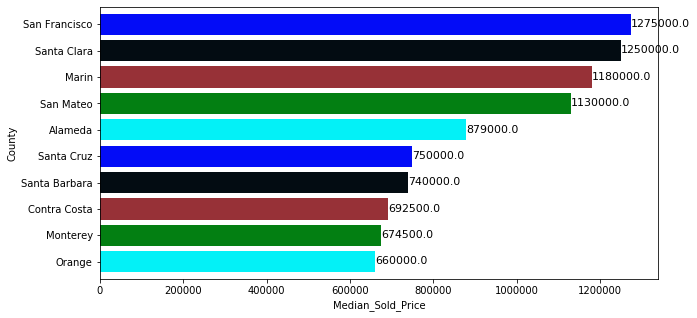

In [12]:
plt.figure(figsize=(10,5))
ax= median_house_price.plot(kind='barh',width=0.8)
plt.xlabel('Median_Sold_Price')
plt.ylabel('County')
plt.barh(median_house_price.index,median_house_price.values,color=['blue', 'black', 'brown', 'green', 'cyan'],alpha=0.9)

for i in ax.patches[:10]:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+50, i.get_y()+.5, \
            str(round((i.get_width()), 1)), fontsize=11)
# invert for largest on top 
ax.invert_yaxis()
plt.show()


# 2) Median dollar per square 

In [13]:
median_pice_per_sq= data.groupby("county")["per_sq_ft"].median()
median_pice_per_sq.sort_values(ascending=False,inplace=True)
median_pice_per_sq=median_pice_per_sq.head(10)
median_pice_per_sq

county
San Francisco    1034.0
San Mateo         865.0
Santa Clara       726.0
Marin             655.5
Nevada            537.5
Santa Barbara     528.5
Santa Cruz        501.0
Alameda           498.5
Los Angeles       473.0
Contra Costa      423.5
Name: per_sq_ft, dtype: float64

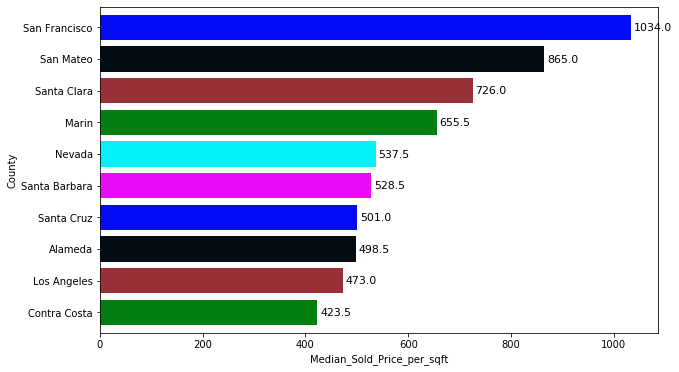

In [14]:
plt.figure(figsize=(10,6))
ax= median_pice_per_sq.plot(kind='barh',width=0.8)
plt.xlabel('Median_Sold_Price_per_sqft')
plt.ylabel('County')
plt.barh(median_pice_per_sq.index,median_pice_per_sq.values,color=['blue', 'black', 'brown', 'green', 'cyan','magenta'],alpha=0.9)

for i in ax.patches[:10]:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+5, i.get_y()+.5, \
            str(round((i.get_width()), 1)), fontsize=11)

# invert for largest on top 
ax.invert_yaxis()
plt.show()

# Question 2 Where are the luxury homes (Price> 2M) located for potential new buyers?

In [15]:
###2.	Where are the luxury homes located for potential new buyers? Price greater than 2M$.
data_new=pd.read_excel("F:/ALL SUB/SEM 2/DATA ANALYTICS/Project/Cleaned_data/Data_Cleaned_Files/Redfin_New_Cleaned.xlsx")
data_new.head(5)

,address,locality,region,postal_code,price,beds,baths,per_sq_ft,area,on_redfin,...,lot_size,stories,county,walkable,walkable Score,transit,transit score,bikeable,bikeable score,# of schools
0,3715 Branding Iron Pl,Dublin,CA,94568,540000,2.0,1.5,531.0,1017.0,6,...,NaN,NaN,Alameda,Car-Dependent,3.0,NaN,NaN,Somewhat Bikeable,17.0,4
1,4453 Porter St,Fremont,CA,94538,799000,3.0,NaN,841.0,950.0,7,...,"5,362 square feet",NaN,Alameda,Somewhat Walkable,50.0,Minimal Transit,37.0,Bikeable,50.0,3
2,661 Lee Ave,San Leandro,CA,94577,799000,2.0,1.5,515.0,1550.0,12,...,"3,900 square feet",NaN,Alameda,Very Walkable,81.0,Good Transit,54.0,Very Bikeable,73.0,3
3,2070 Forino Dr,Dublin,CA,94568,1489000,5.0,3.5,420.0,3545.0,5,...,"5,140 square feet",2,Alameda,Car-Dependent,13.0,NaN,NaN,Somewhat Bikeable,11.0,5
4,5321 N Esprit Loop,Dublin,CA,94568,790000,3.0,2.5,494.0,1598.0,5,...,NaN,3+,Alameda,Somewhat Walkable,54.0,NaN,NaN,Very Bikeable,90.0,3


In [16]:
from matplotlib import pyplot as plt
from itertools import cycle, islice
import pandas, numpy as np  
price= data_new[ (data_new['price']>2000000) &  (data_new['price'] < 100000000) ]
x= price.groupby("county")["price"].median()
#len(data)
x.sort_values(ascending=False,inplace=True)
x=x.head(5)
x
#df = pandas.DataFrame(x)



county
Napa             4199750
Merced           3990000
Santa Barbara    3695000
Orange           3595000
Lake             3500000
Name: price, dtype: int64

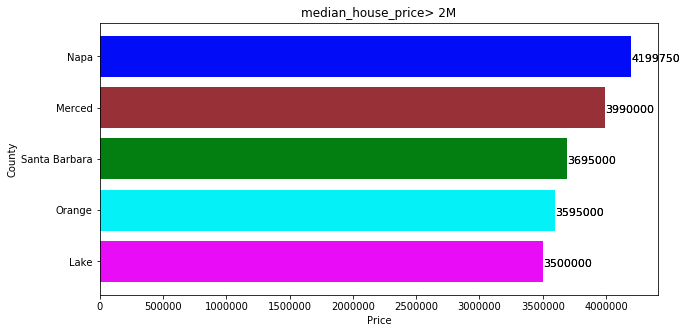

In [17]:
plt.figure(figsize=(10,5))
ax= x.plot(kind='barh',width=0.8)
plt.xlabel('Price')
plt.ylabel('County')
plt.title("median_house_price> 2M")
plt.barh(x.index,x.values,color=['blue','brown', 'green', 'cyan','magenta'],alpha=0.9)

for i in ax.patches[:10]:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+5, i.get_y()+.5, \
           str(round((i.get_width()), 1)), fontsize=11)

# invert for largest on top 
ax.invert_yaxis()
plt.show()


# Question 1 Regression Analysis to predict house values/prices in Solano County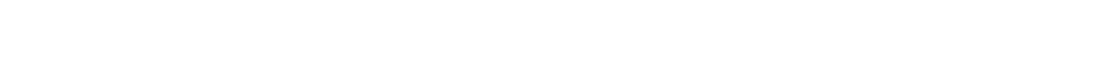

In [24]:
data_sold=pd.read_excel(data_dir+sold_data_file)
data=data_sold[data_sold['sold_price_list'].notnull()]
data=data.loc[(data['county']=='Solano') & (data['sold_price_list'] > 100000) & (data['sold_price_list'] < 2000000),:].fillna(method='ffill')
len(data)      


194

In [22]:
X = data[['beds', 'baths', 'transit score', 'bikeable score', '# of schools']].values
y = data['sold_price_list'].values

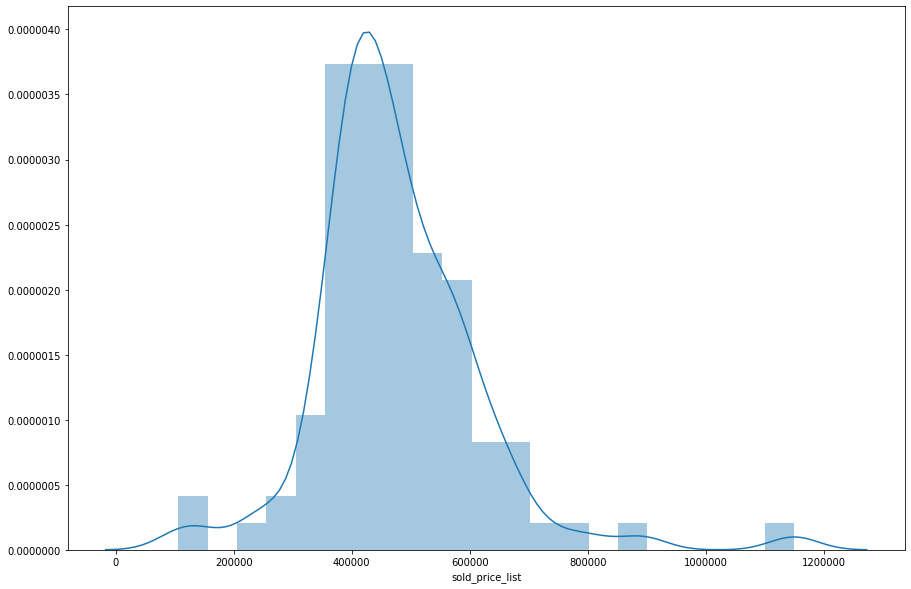

In [25]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['sold_price_list'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

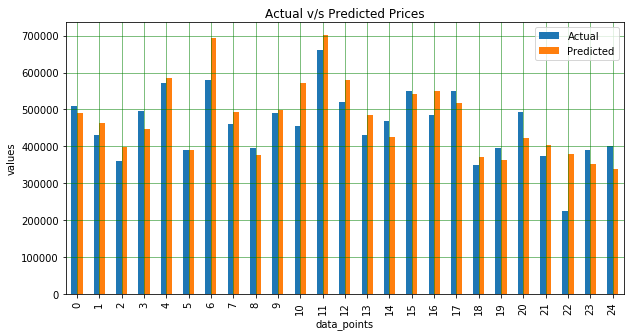

In [36]:
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("data_points")
plt.ylabel("values")
plt.title("Actual v/s Predicted Prices")
plt.show()

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51651.530168893674
Mean Squared Error: 6022235710.364971
Root Mean Squared Error: 77603.0650835711
